# 📊📉Analyse exploratoire des données 

In [1]:
import os
import pandas as pd
import numpy as np  
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

from pathlib import Path

sns.set_theme(style="whitegrid", palette="muted")
from matplotlib import rcParams
palette = sns.color_palette("pastel")



import warnings
warnings.filterwarnings("ignore")

## I - Importation des données

In [2]:
BASE_DIR = Path().resolve().parent
DATA_DIR = BASE_DIR / 'Donnees'

print(f"BASE_DIR: {BASE_DIR}")
print(f"DATA_DIR: {DATA_DIR}")

BASE_DIR: C:\Users\NAZIFOU\Car-price
DATA_DIR: C:\Users\NAZIFOU\Car-price\Donnees


In [3]:
df = pd.read_csv(DATA_DIR / 'vehicules.csv')
df.head()

,Modèle,Prix,Transmission,Version,Kilométrage,Carburant,Puissance,Évaluations,Vendeur,Nom de la Voiture,Date
0,audi,€ 74 999,Boîte automatique,55 TFSI Quattro Tiptronic S-Line INDIVIDUAL!,34 000 km,Essence,250 kW (340 CH),121,Kristof D'herde • BE-9300 Aalst,Audi Q855 TFSI Quattro Tiptronic S-Line INDIVI...,01/2021
1,audi,€ 118 900,Boîte automatique,60 Hybride 49 CO2 BlackPack B&O 23' Leather,10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybride 49 CO2 BlackPack B&O 23' Lea...,01/2024
2,audi,€ 118 900,Boîte automatique,60 Hybr 49gr Sline BlackPack B&O Leather 23',10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybr 49gr Sline BlackPack B&O Leathe...,01/2024
3,audi,€ 59 995,Boîte automatique,50 TDi S-Line Quattro Tiptronic,95 702 km,Diesel,210 kW (286 CH),75,Mhr Jannick Lazoore • BE-8620 Nieuwpoort,Audi Q850 TDi S-Line Quattro Tiptronic,04/2019
4,audi,€ 76 900,Boîte automatique,50 TDI quattro tiptronic competition plus! Full !,19 000 km,Diesel,210 kW (286 CH),252,Sam B • BE-3970 Leopoldsburg,Audi Q850 TDI quattro tiptronic competition pl...,09/2022


In [5]:
print(f"la dimension de notre table  est : {df.shape}")

la dimension de notre table  est : (2680, 11)


2680 observations et 11 variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Modèle             2680 non-null   object
 1   Prix               2680 non-null   object
 2   Transmission       2680 non-null   object
 3   Version            2660 non-null   object
 4   Kilométrage        2680 non-null   object
 5   Carburant          2680 non-null   object
 6   Puissance          2680 non-null   object
 7   Évaluations        2680 non-null   object
 8   Vendeur            2680 non-null   object
 9   Nom de la Voiture  2680 non-null   object
 10  Date               2680 non-null   object
dtypes: object(11)
memory usage: 230.4+ KB


Structure générale
- Nombre d’observations (lignes) : 2 680
- Nombre de colonnes (variables) : 11
- Index : de 0 à 2679 (RangeIndex par défaut)

In [8]:
df.isnull().sum().to_frame().T

,Modèle,Prix,Transmission,Version,Kilométrage,Carburant,Puissance,Évaluations,Vendeur,Nom de la Voiture,Date
0,0,0,0,20,0,0,0,0,0,0,0


Toutes les colonnes sauf Version n’ont aucune valeur "0" (ce qui est généralement une bonne chose).

Version a 20 valeurs "0" → probablement des valeurs manquantes ou non renseignées.

In [110]:
nbre_Na = df.isnull().sum().sum()
print(f"Nombre de valeurs manquantes : {nbre_Na}")

Nombre de valeurs manquantes : 20


Nous allons donc traiter ces valeurs manquants par la suppression des ces derniers vu qu'ils representent que 0.7 % des données à notre disposition 

étant la seul colonne et au vu de notre objectif nous allons supprimer les colonnes 'Version', 'Date', 'Vendeur' et 'Nom de la Voiture'

## II- Nettoyage et Préparation des données 

In [9]:
def stats_nettoie (df) :
    
    """Nettoyage""" 
    
    df.columns = df.columns.str.lower()
    df = df.drop(['date', 'version','vendeur', 'nom de la voiture'], axis=1) 
    df['prix'] = df['prix'].str.replace('€', '').str.replace(' ', '').str.replace(',', '.').astype(float)
    df['transmission'] = df['transmission'].replace(['- Boîte', 'Boite non disponible'], 'Autre')
    df['kilométrage'] = df['kilométrage'].str.replace('km', '').str.replace(' ', '').str.replace(',', '.').str.replace('- ', '0').astype(float)
    df['carburant'] = df['carburant'].replace(['- Carburant','CNG'], 'Autres')
    df['puissance'] = df['puissance'].str.extract('(\d+\.?\d*) CH').astype(float)
    df['évaluations'] = df['évaluations'].replace('Évaluations non disponibles', 0).astype(float)
    df= df.dropna(subset=['puissance'])
    
    return df

In [11]:
df = stats_nettoie(df)

df.head()

,modèle,prix,transmission,kilométrage,carburant,puissance,évaluations
0,audi,74999.0,Boîte automatique,34000.0,Essence,340.0,121.0
1,audi,118900.0,Boîte automatique,10.0,Electrique/Essence,462.0,107.0
2,audi,118900.0,Boîte automatique,10.0,Electrique/Essence,462.0,107.0
3,audi,59995.0,Boîte automatique,95702.0,Diesel,286.0,75.0
4,audi,76900.0,Boîte automatique,19000.0,Diesel,286.0,252.0


In [12]:
print(f"dimension après nettoyage et préparation : {df.shape}")

dimension après nettoyage et préparation : (2670, 7)


Après nettoyage des données nous avons:
- 7 variables ('modèle', 'prix', 'transmission', 'kilométrage', 'carburant', 'puissance', 'évaluations')
- 2670 obseervations

In [14]:
print(f"Nombre de valeurs manquantes après nettoyage : {df.isnull().sum().sum()}")

Nombre de valeurs manquantes après nettoyage : 0


In [15]:
df.dtypes

modèle           object
prix            float64
transmission     object
kilométrage     float64
carburant        object
puissance       float64
évaluations     float64
dtype: object

**Variables numériques (4)**
- prix : float64
- kilométrage : float64
- puissance : float64
- évaluations : float64

**Variables catégorielles encodées(3)**
- Modèles : object
- Carburants : object
- Transmission : object



## III- Analyse univariée

Objectif : étudier chaque variable indépendamment pour détecter les distributions, outliers, modalités dominantes, etc.

1. **Les variables numériques**

In [16]:
var_num = df.select_dtypes(include=['float', 'int']).columns.tolist()
print(f"Variables numériques : {var_num}")

Variables numériques : ['prix', 'kilométrage', 'puissance', 'évaluations']


1.1 Statistiques 

In [17]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
prix,2670.0,96578.187266,110014.952759,3900.0,22000.0,54950.0,119950.0,749995.0
kilométrage,2670.0,53196.666667,44613.449888,0.0,14500.0,44467.0,89088.0,222222.0
puissance,2670.0,352.940075,222.026120,69.0,140.0,286.0,581.0,850.0
évaluations,2670.0,71.760300,101.638555,0.0,9.0,38.0,93.0,671.0


**prix**
- La distribution est très asymétrique à droite (positive skew) : la moyenne est bien au-dessus de la médiane.
- Il y a probablement des voitures de luxe (max à ~750k €) qui font monter la moyenne.
- Forte variabilité des prix → tu pourrais envisager une transformation log si tu veux normaliser cette variable

**kilométrage**
- La distribution semble aussi asymétrique à droite, mais moins extrême.
- Présence de véhicules quasiment neufs (0 km) et d’autres très utilisés (> 200 000 km).
- L'écart-type est assez élevé → là aussi, possibilité d'utiliser une discrétisation ou une transformation selon ton cas d’usage.

**puissance**
- Valeurs très élevées : la puissance moyenne est beaucoup plus haute que la norme (la plupart des voitures tournent entre 70 et 300 ch).
- Indice qu'il y a beaucoup de voitures sportives ou haut de gamme.
- Il pourrait être judicieux d’analyser cette variable par segment (ex. : <150 ch, 150–300 ch, etc.).

**évaluations** 
- La variable évaluations est fortement asymétrique : beaucoup de voitures ont peu d'évaluations, mais certaines en ont énormément.
- Cela peut refléter la popularité ou la visibilité en ligne de certains modèles.
- Tu pourrais créer des catégories : "non évalué", "peu évalué", "très évalué".

1.2 distributions 

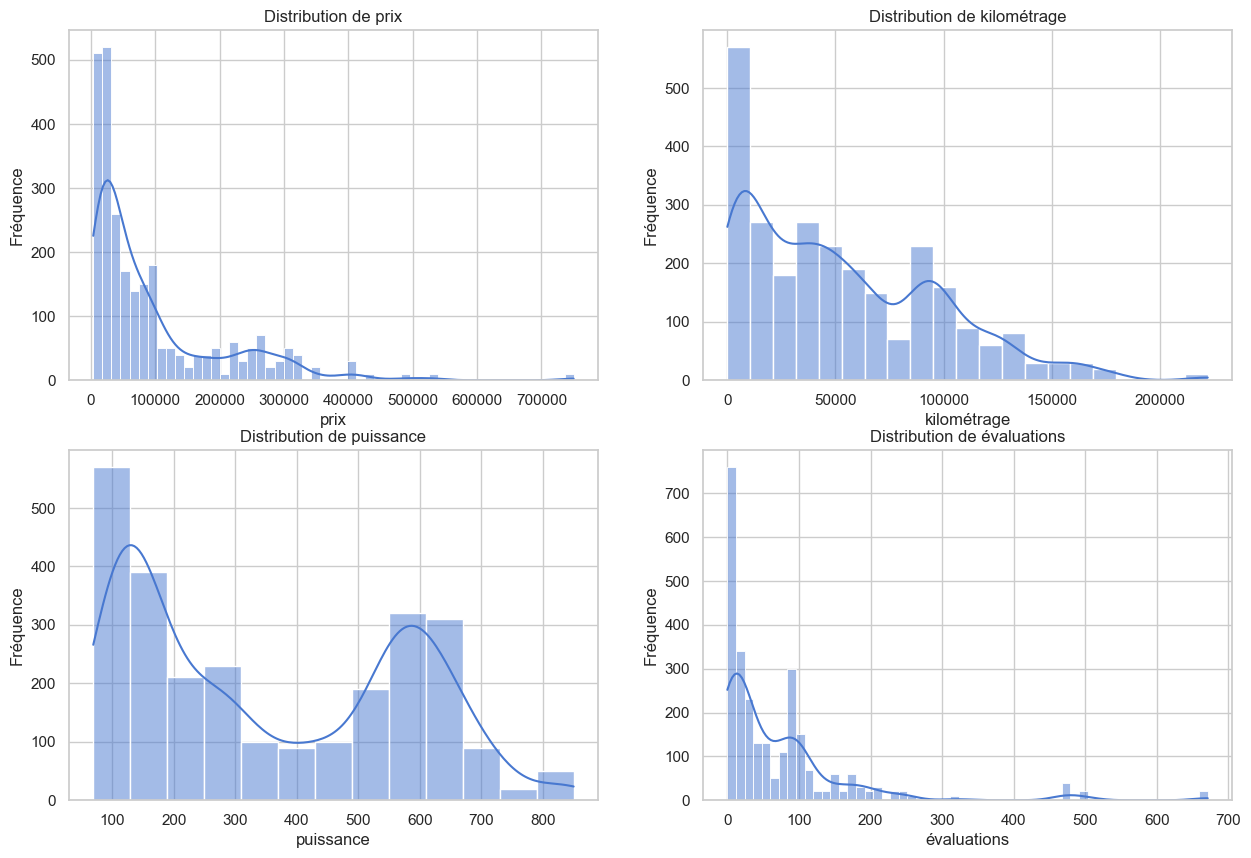

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, var in enumerate(var_num) :
    sns.histplot(df[var_num[i]], kde=True, ax=axes[i], palette='Muted')
    axes[i].set_title(f"Distribution de {var_num[i]}")
    axes[i].set_xlabel(var_num[i])
    axes[i].set_ylabel("Fréquence")


**Distribution de prix**:
- Très asymétrique à droite (positive skew) : la majorité des véhicules sont en-dessous de 100 000 €, mais quelques-uns atteignent les 700 000 €+.
- On observe un gros pic vers 20 000–50 000 €, qui pourrait correspondre aux véhicules "standards" ou abordables.
- Les valeurs extrêmes (voitures de luxe ?) tirent la moyenne vers le haut.

**Distribution de kilométrage**:
- Même type de distribution : asymétrie à droite, beaucoup de voitures avec peu de km (< 50 000), et quelques-unes très utilisées (> 150 000 km).
- Un pic très net autour de 0–10 000 km → probablement des véhicules neufs ou reconditionnés.
- Possible données regroupées par tranche ou seuils marketing.

**Distribution de puissance**:
- Cette variable est bimodale, avec deux pics nets :
- Un autour de 100–200 ch (voitures classiques)
- Un autre vers 600 ch (voitures sportives / de luxe)
- Forte variabilité → important de bien la traiter si on veut prédire le prix ou segmenter les véhicules.

**Distribution de évaluations**:
- Forte concentration vers les valeurs faibles (0–50 évaluations), et une longue traîne à droite.
- Beaucoup de véhicules n’ont pas ou très peu d’évaluations, alors que quelques-uns sont extrêmement populaires (600+ évaluations).
- Distribution typique de la popularité en ligne (loi de puissance ou loi de Zipf).

2. **Les variables catégorielles**

In [19]:
cat_var = df.select_dtypes(include=['object', 'bool']).columns.tolist()
#cat_var
print(f"Variables catégorielles : {cat_var}")

Variables catégorielles : ['modèle', 'transmission', 'carburant']


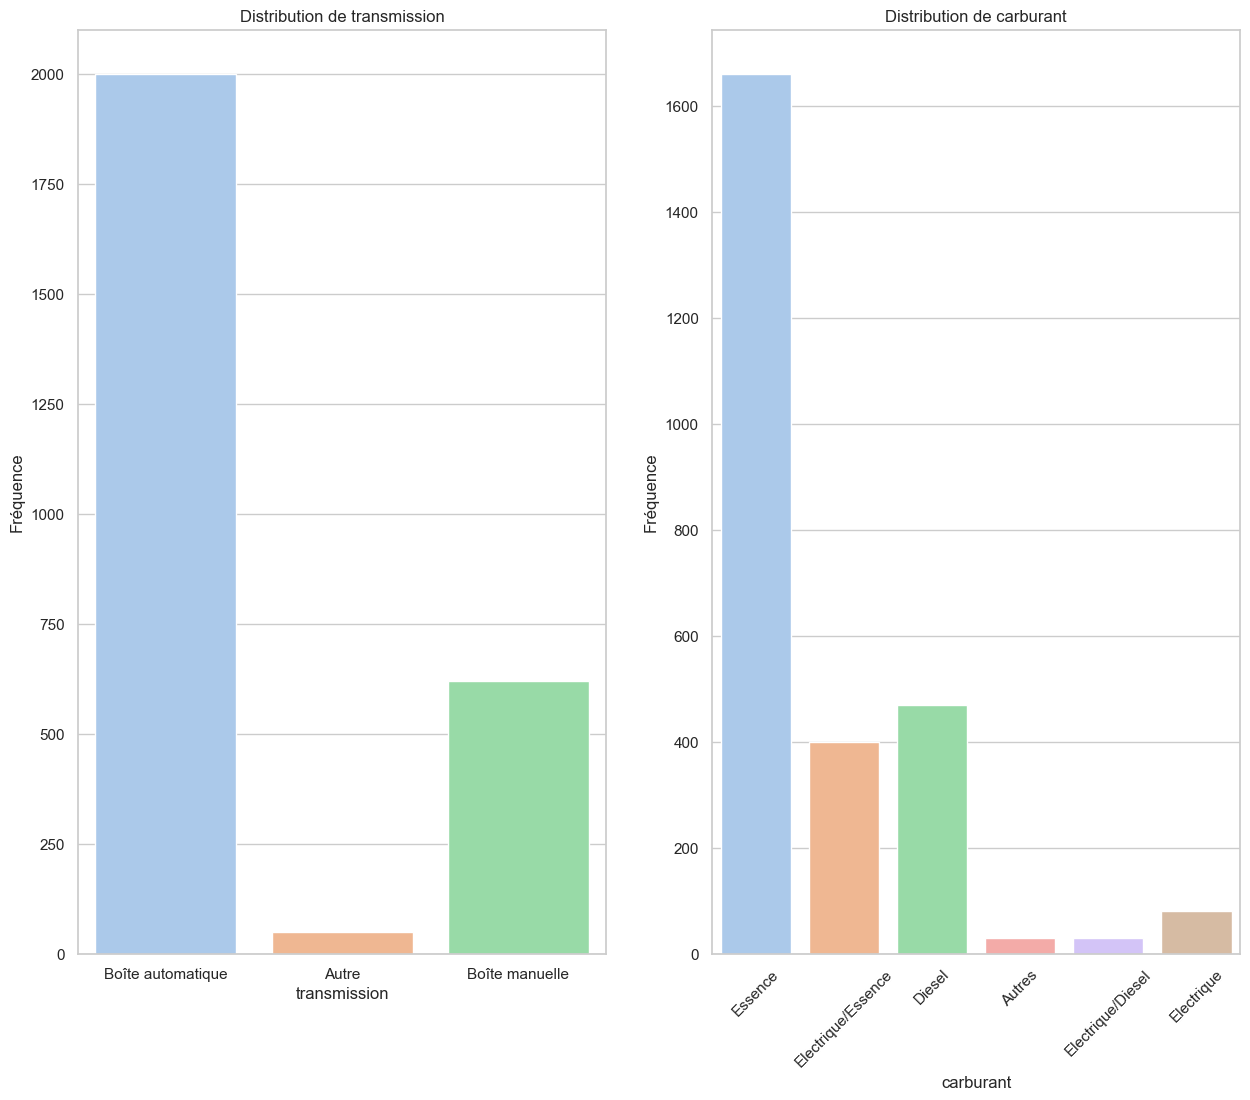

In [20]:
# viu=sualisation de la distribution des variables catégorielles
cat_var = ['transmission', 'carburant']

fig, axes = plt.subplots(1, 2, figsize=(15, 12))
axes = axes.flatten()
for i, var in enumerate(cat_var) :
    sns.countplot(data=df, x=var, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")
    plt.xticks(rotation=45)

**Interprétation** :

1. Distribution de la transmission
- Notre dataset est largement dominé par des véhicules automatiques.
- Les manuelles restent présentes mais minoritaires.
- La catégorie "Autre transmission" est très marginale — tu pourrais éventuellement l’agréger dans une catégorie "Autres" si tu veux simplifier

2. Distribution du carburant
- Le marché est encore largement dominé par l’essence.
- Le diesel arrive en deuxième, ce qui est cohérent avec un parc automobile "classique".
- La présence des véhicules hybrides (électrique/essence) est notable (~15%), signe d’une transition énergétique.
- L’électrique pur reste encore minoritaire, ce qui peut impacter certaines analyses (valeurs rares, traitements spécifiques…).

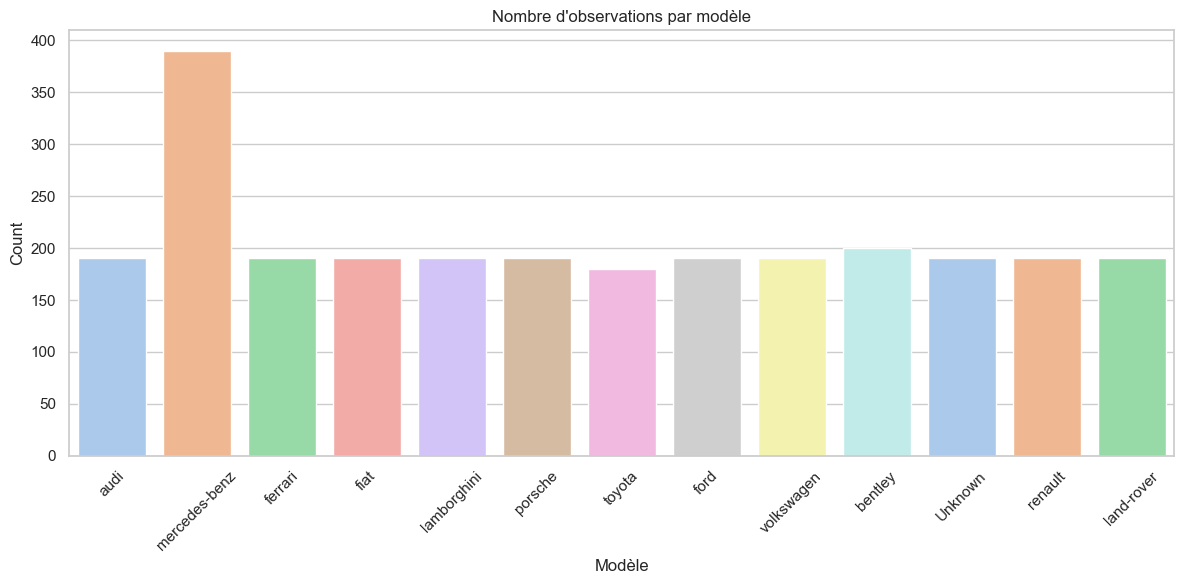

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='modèle', palette='pastel')
plt.xticks(rotation=45)
plt.title("Nombre d'observations par modèle")
plt.xlabel("Modèle")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Observations générales :
- Mercedes-Benz domine très nettement avec près de 400 occurrences, soit le double des autres marques.
- Les autres marques comme Audi, Ferrari, Fiat, Lamborghini, Porsche, etc., sont relativement équitables, autour de 180–200 voitures.
- La catégorie "Unknown" est aussi présente (~190), ce qui pourrait désigner des véhicules dont la marque n’a pas été renseignée ou mal encodée.

Mercedes-Benz est surreprésentée dans le dataset. Cela pourrait :
- Influencer une analyse de prix ou de performances si non équilibrée.
- Présence de "Unknown" :Il faudra nettoyer cette valeur : soit la retirer, soit la regrouper dans "Autres" ou investiguer son origine.

On retrouve des marques haut de gamme (Porsche, Lamborghini, Bentley), des généralistes (Toyota, Ford, Volkswagen), et du luxe (Ferrari, Mercedes).

Cela indique un marché assez diversifié : parfait pour une analyse comparative ou une modélisation segmentée.



## IV- Analyse bivariée/multivariée

1. **Variables numériques**

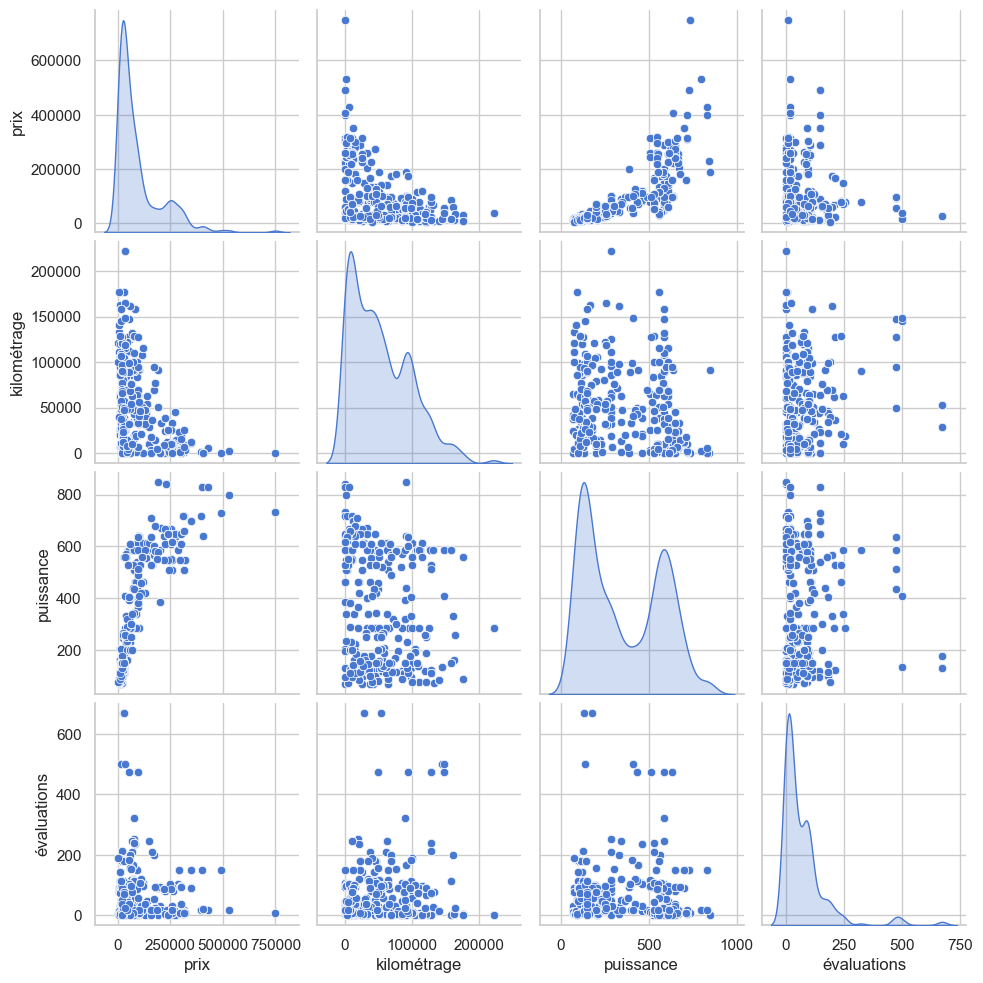

In [29]:
sns.pairplot( df.select_dtypes(include=['float', 'int']), diag_kind='kde',  palette= 'deep')

Corrélations visibles dans les scatterplots
**Prix vs Puissance**
- Relation positive nette : plus la puissance augmente, plus le prix augmente.
- Nuage de points en diagonale montante, malgré quelques valeurs extrêmes.

📌 Corrélation forte, attendue : véhicules puissants sont souvent haut de gamme.

**Prix vs Kilométrage**
- Relation inverse : plus le kilométrage est élevé, plus le prix tend à baisser.
- Assez dispersé mais tendance descendante visible.

📌 Logique : un véhicule plus usé vaut moins cher


**Prix vs Évaluations**
- Très faible corrélation apparente.
- Beaucoup de véhicules à bas prix et peu d’évaluations ; quelques cas rares très évalués.

📌 Les évaluations semblent peu influentes directement sur le prix.

**Kilométrage vs Puissance**
- Pas de relation claire.
- Des véhicules puissants peuvent avoir beaucoup ou peu de kilomètres.

📌 Variables probablement indépendantes.

**Évaluations vs toutes les autres**
- Évaluations est dispersée dans toutes ses relations.
- Elle ne suit pas de tendance linéaire évidente.

📌 Peut être liée à la popularité ou visibilité commerciale, pas aux caractéristiques techniques.


**Diagonale (KDE plots)**

Ces courbes montrent la distribution individuelle de chaque variable :

Prix, Kilométrage, Évaluations : distributions fortement asymétriques à droite.

Puissance : bimodale, ce qui confirme ce qu’on a vu avant (voitures standard vs sportives).


2. **Variable catégorielle vs variables numériques**

In [22]:
df.groupby('modèle').mean(numeric_only=True)

,prix,kilométrage,puissance,évaluations
modèle,,,,
Unknown,33575.526316,55800.157895,237.736842,142.526316
audi,74764.105263,62942.789474,310.157895,78.210526
bentley,156540.300000,56087.550000,571.700000,92.800000
ferrari,255327.789474,25811.210526,650.210526,39.789474
fiat,13574.894737,45679.368421,97.368421,49.684211
ford,19837.421053,68453.684211,144.473684,57.842105
lamborghini,257148.894737,29149.473684,614.578947,57.473684
land-rover,64639.473684,61495.315789,263.578947,63.315789
mercedes-benz,137876.897436,64555.923077,590.051282,73.692308


1. **prix moyen par marque**

Marques les plus chères :

lamborghini (~257k €)

ferrari (~255k €)

bentley (~156k €)

mercedes-benz (~138k €)

Marques les plus abordables :

fiat (~13.5k €)

volkswagen, renault, ford (~18–19k €)

➡️ Très bonne séparation entre véhicules de luxe et grand public.


2. **puissance moyenne**

Plus puissantes :

ferrari (~650 ch)

lamborghini (~615 ch)

mercedes-benz (~590 ch)

Moins puissantes :

fiat (~97 ch)

volkswagen, renault, toyota (~120–150 ch)

➡️ On retrouve une corrélation prix ↔ puissance très claire ici.


3. **kilométrage moyen**
Véhicules les plus récents (moins de km) :

ferrari (~25k km)

lamborghini (~29k km)

toyota (~32k km)

Plus usés :

ford, renault, audi, mercedes-benz (~60–68k km)

➡️ Les voitures de luxe sont souvent moins roulées, peut-être récentes ou collection.


4. **Évaluations moyennes**

Plus populaires / visibles :

Unknown (~142)

audi, volkswagen, bentley, porsche (~78–92)

Moins évaluées :

toyota, ferrari, fiat (~35–50)

➡️ La popularité en ligne ne suit pas toujours le prix ou la puissance.
Certaines marques "grand public" (comme VW) sont bien plus visibles que des marques de luxe.

In [23]:
df.groupby('transmission').mean(numeric_only=True)

,prix,kilométrage,puissance,évaluations
transmission,,,,
Autre,214111.000000,55359.400000,560.800000,13.600000
Boîte automatique,115199.555000,49548.080000,414.165000,73.890000
Boîte manuelle,27030.806452,64791.887097,138.677419,69.580645


**Analyse comparative**

- **prix**
Les voitures automatiques sont beaucoup plus chères que les manuelles (~4x).

Les véhicules "Autre transmission" sont encore plus chers (~214k €), probablement des modèles très haut de gamme ou atypiques.

**kilométrage**
Les voitures manuelles ont, en moyenne, plus roulé (~65k km) que les autres.

Les automatiques sont un peu plus récentes (~50k km).

**puissance**
Boîte manuelle : véhicules moins puissants (138 ch).

Boîte automatique : très puissants en moyenne (414 ch).

"Autre" transmission : encore plus puissants (~561 ch), donc très probablement des supercars ou véhicules spéciaux.

**évaluations**
Assez proche entre auto et manuelle (~70 évaluations), donc popularité similaire.

Les voitures "Autre transmission" sont moins évaluées → peut-être plus rares ou moins accessibles.

**Conclusion rapide** :

- Transmission	Interprétation
- Boîte manuelle	Voitures moins puissantes, moins chères, plus utilisées → véhicules classiques/abordables.
- Boîte automatique	Voitures plus puissantes, plus chères, modérément usées → véhicules haut de gamme, premium.
- Autre	Voitures très puissantes, très chères, peu évaluées → probablement des modèles exclusifs ou atypiques.

In [25]:
df.groupby('carburant').mean(numeric_only=True)

,prix,kilométrage,puissance,évaluations
carburant,,,,
Autres,31135.000000,105959.333333,198.666667,30.000000
Diesel,36813.297872,80209.744681,188.914894,66.829787
Electrique,52607.500000,29848.375000,329.375000,114.125000
Electrique/Diesel,54328.333333,52666.666667,214.333333,73.000000
Electrique/Essence,72515.075000,37508.400000,282.900000,81.075000
Essence,123363.240964,49509.945783,422.686747,69.602410


**Interprétation** variable par variable**
- **Prix moyen**

Essence domine avec une moyenne très élevée (~123k €), probablement influencé par de nombreuses voitures sportives ou premium.

Électrique/Essence et Électrique sont aussi relativement chers → en cohérence avec la tendance du marché (prix des technologies hybrides ou EV).

Diesel et Autres sont les moins chers → marché plus ancien ou utilitaire.

**kilométrage moyen**

Électriques purs ont le plus faible kilométrage (~30k km) → véhicules récents, moins usés.

Les voitures à carburant classique (Diesel, Autres) affichent les kilométrages les plus élevés (>80k km), logique car véhicules souvent plus anciens.

**puissance moyenne**

Les véhicules à essence ont la puissance moyenne la plus élevée (~423 ch), ce qui reflète la présence de voitures sport/luxe dans cette catégorie.

Les hybrides et électriques purs ont aussi des puissances élevées, preuve d’une montée en gamme de ces types.

Diesel reste le plus modeste en puissance (~189 ch).

**évaluations**

Électriques ont le taux d’évaluation le plus élevé (~114) → peut-être car plus récents, plus visibles, ou plus "consultés" en ligne.

Autres carburants sont nettement en retrait (~30).

####  Types de transmission vs les variables numériques

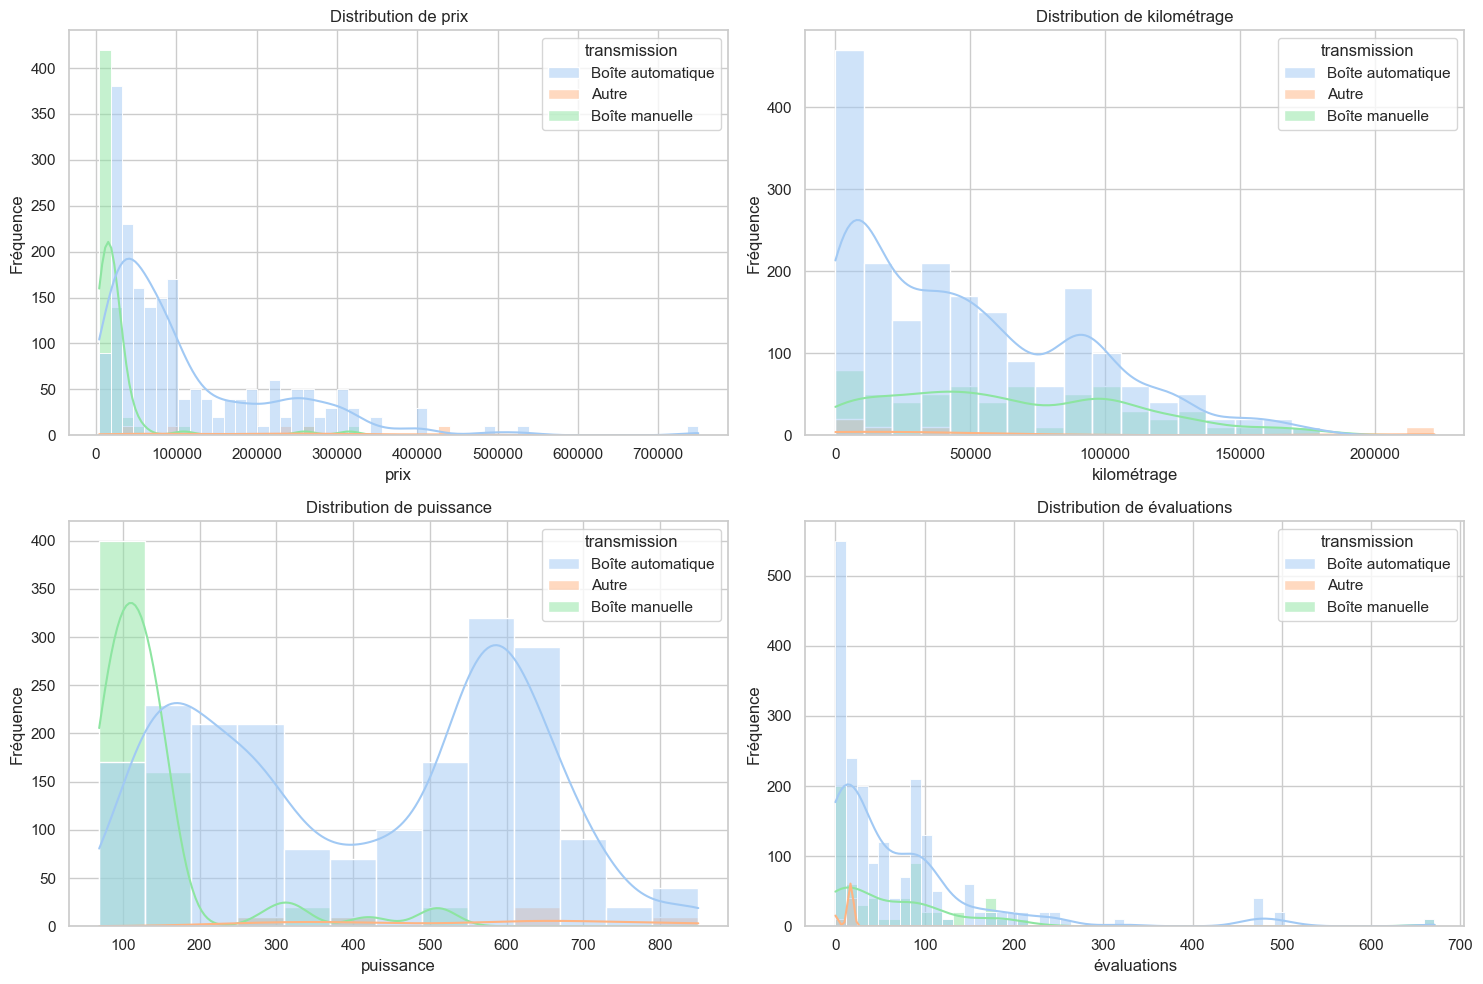

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(var_num):
    sns.histplot(data=df, x=var, kde=True, hue='transmission', ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Cacher les axes restants s'il y en a plus que nécessaire
for j in range(len(var_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

####  Carburant vs les variables numériques

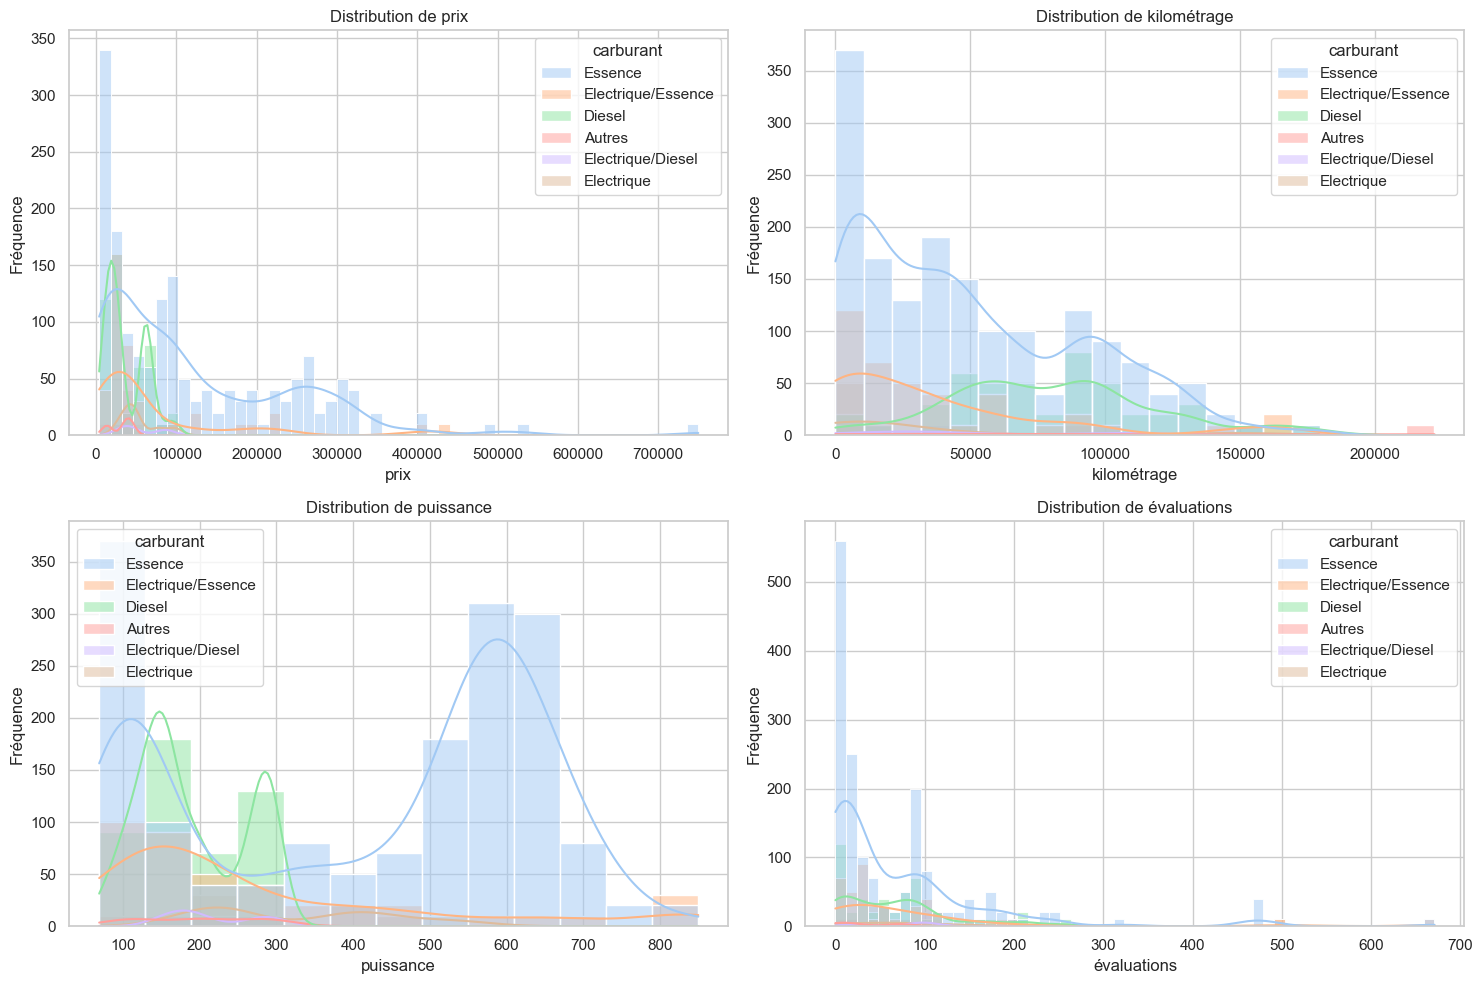

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(var_num):
    sns.histplot(data=df, x=var, kde=True, hue='carburant', ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Cacher les axes restants s'il y en a plus que nécessaire
for j in range(len(var_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

####  Les modèles vs les variables numériques

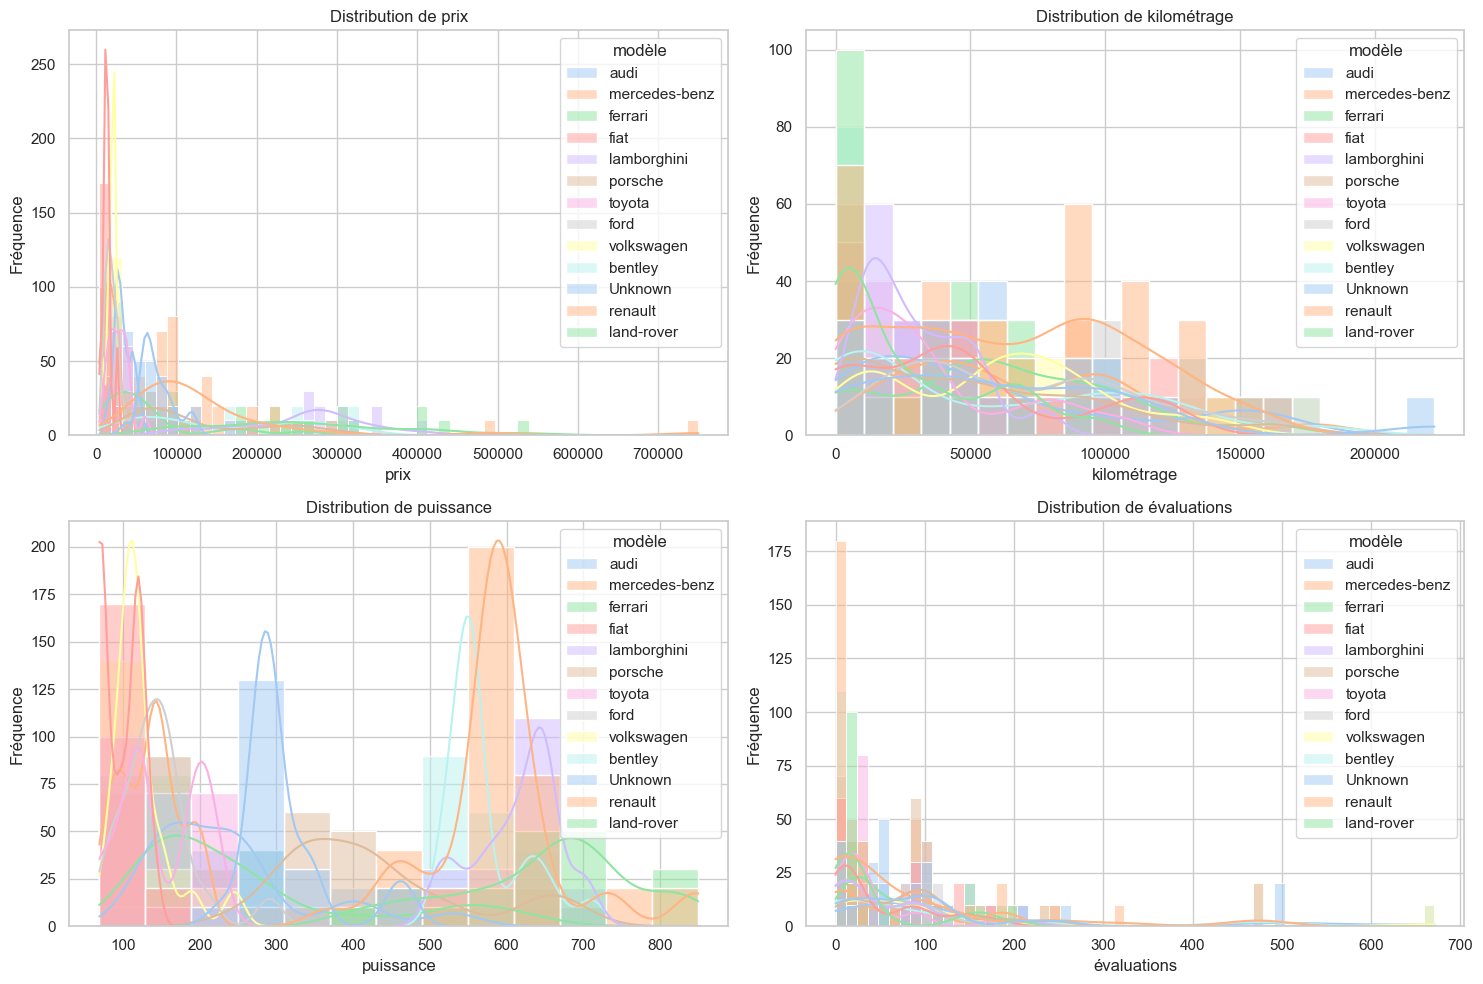

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(var_num):
    sns.histplot(data=df, x=var, kde=True, hue='modèle', ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Cacher les axes restants s'il y en a plus que nécessaire
for j in range(len(var_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

3. **Les variables catégorielles**

<Axes: xlabel='carburant', ylabel='transmission'>

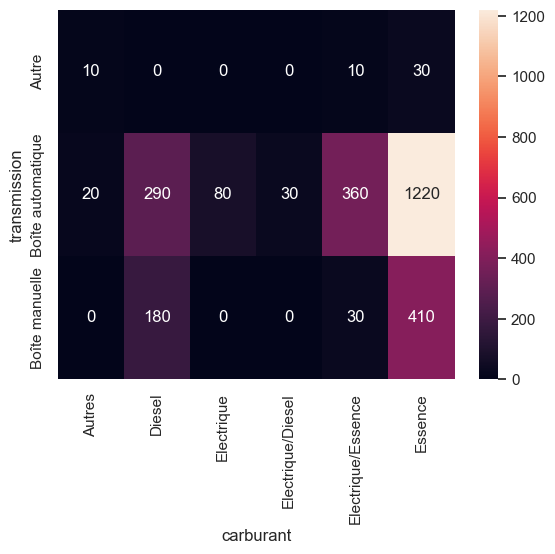

In [30]:
tab1 = pd.crosstab(df['transmission'], df['carburant'])
sns.heatmap(tab1, annot=True, fmt="d")


<Axes: xlabel='modèle', ylabel='transmission'>

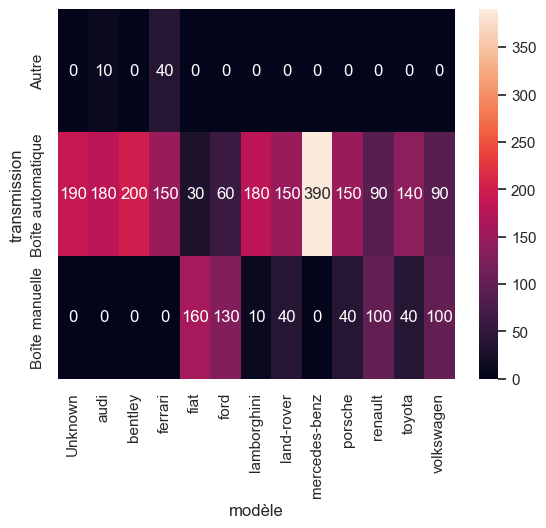

In [31]:
tab2 = pd.crosstab(df['transmission'], df['modèle'])
sns.heatmap(tab2, annot=True, fmt="d")

<Axes: xlabel='modèle', ylabel='carburant'>

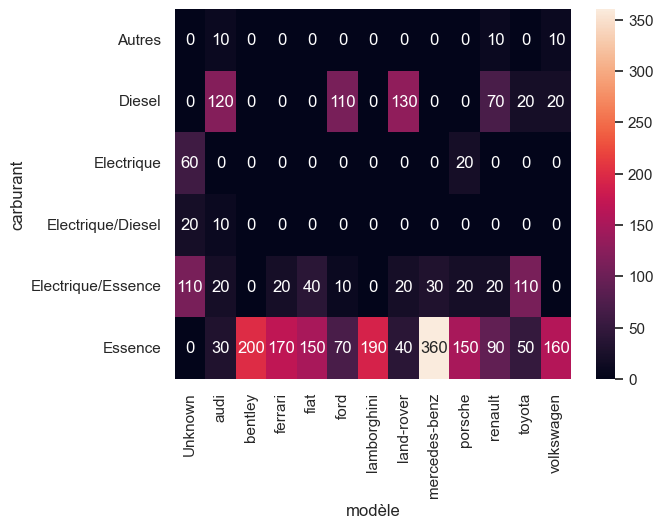

In [32]:
tab3 = pd.crosstab(df['carburant'], df['modèle'])
sns.heatmap(tab3, annot=True, fmt="d")

## V- Corrélation 

1. **Corrélation entre les variables numériques**

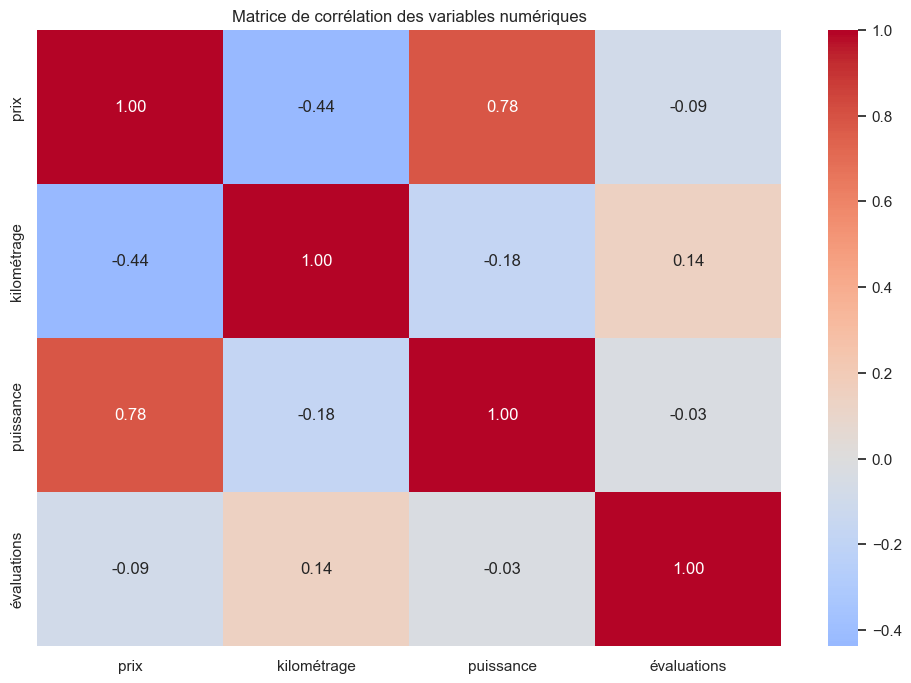

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

- Variables les plus informatives pour le prix :

puissance est très fortement corrélée → un bon prédicteur.

kilométrage est modérément corrélé négativement, logique aussi.

- évaluations :

Aucune relation significative avec les autres variables.

Peut être intéressant pour la popularité, mais pas pertinent pour un modèle prédictif de prix.

2. **Corrélation entre les variables catégorielles**

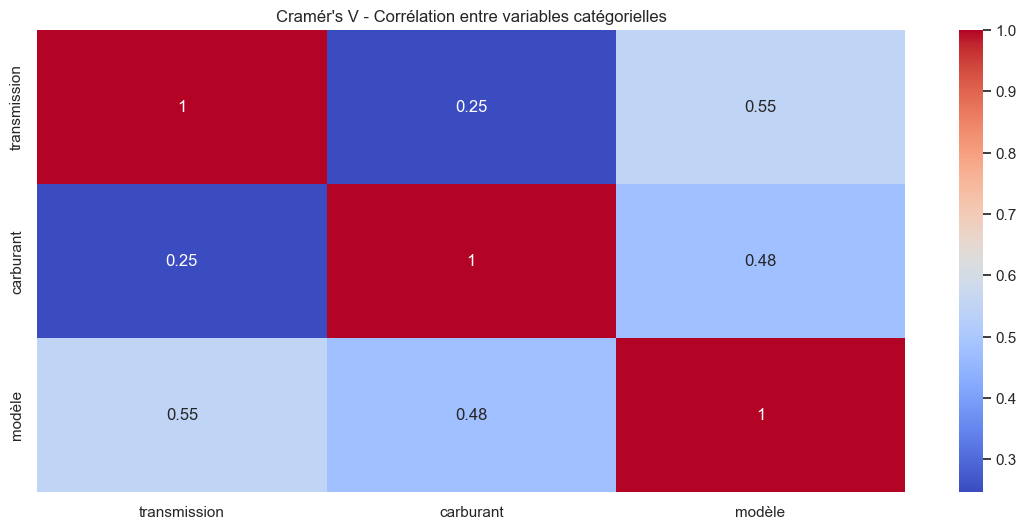

In [34]:
from scipy.stats import chi2_contingency 

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1)) if min(k-1, r-1) > 0 else 0

def cramers_v_matrix(df_cat):
    cols = df_cat.columns
    matrix = pd.DataFrame(index=cols, columns=cols)
    for col1 in cols:
        for col2 in cols:
            matrix.loc[col1, col2] = cramers_v(df_cat[col1], df_cat[col2])
    return matrix.astype(float)

# Supposons que ce sont tes colonnes catégorielles :
cat_cols = ['transmission', 'carburant', 'modèle']
cramers_matrix = cramers_v_matrix(df[cat_cols])

# Visualisation
plt.figure(figsize=(14,6))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm')
plt.title("Cramér's V - Corrélation entre variables catégorielles")
plt.show()

1. **Transmission ↔ Modèle (0.55)**

Corrélation relativement forte : certains modèles sont fortement associés à un type de boîte (ex : Mercedes = automatique).

Utile pour la modélisation : attention à la redondance d’information si tu veux garder les deux.

2. **Carburant ↔ Modèle (0.48)**

Certains modèles sont typiquement associés à un type de carburant :

Ex : Tesla = électrique, Fiat = essence, etc.

Logique, mais à prendre en compte si tu veux éviter la colinéarité.

#### **En somme**

Explorer les relations entre caractéristiques des véhicules (prix, puissance, kilométrage, évaluations, carburant, transmission, modèle)
 afin de mieux comprendre le marché et préparer une éventuelle modélisation prédictive.

1. **Analyse des variables numériques**

Prix : très asymétrique à droite, influencé par quelques véhicules très chers. Moyenne autour de 96 000 €.

Puissance : forte corrélation positive avec le prix (r = 0.78). Distribution bimodale (voitures standard vs sportives).

Kilométrage : corrélé négativement au prix (r = -0.44), logique. Fortement asymétrique.

Évaluations : très peu corrélée aux autres variables. Plutôt un indicateur de popularité en ligne qu’une caractéristique technique.


2. **Corrélation des variables**

Numériques :

prix dépend surtout de puissance et kilométrage.

Catégorielles (via Cramér’s V) :

modèle est modérément à fortement lié à transmission (0.55) et carburant (0.48).

Peu de redondance entre transmission et carburant → complémentarité utile en modélisation.


3. **Comparaison par groupes**

**Par transmission** :

Boîte automatique : véhicules plus chers et puissants.

Manuelle : véhicules moins chers, plus kilométrés.

Autre transmission : véhicules très puissants, exclusifs (et peu évalués).

**Par carburant** :

Essence : le plus cher et le plus puissant.

Électrique : moderne, peu utilisé, très bien évalué.

Diesel : moins cher, plus ancien, plus kilométré.

**Par modèle** :

Marques comme Ferrari, Lamborghini, Mercedes → très puissantes et chères.

Marques comme Fiat, Ford, Renault → plus abordables, moins puissantes.

Unknown a une bonne quantité d’évaluations → attention à la qualité des données.

**Recommandations**

💡 Pour modéliser le prix : garder puissance, kilométrage, transmission, carburant et éventuellement un modèle simplifié (regroupé par segment).

🔧 Penser à transformer ou normaliser prix, kilométrage pour améliorer la distribution.

⚠️ Attention aux valeurs extrêmes (prix > 500k €) qui pourraient biaiser une régression.

🧼 Nettoyer ou regrouper les catégories rares (modèle, carburant, etc.).